# **1. Introduction**
> A famous and widely used forecasting method for time-series prediction is the AutoRegressive Integrated Moving Average (ARIMA) model.Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. They are widely used in technical analysis to forecast future security prices.

# **Installation Arima Model**


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 15.3MB/s 
     |████████████████████████████████| 9.5MB 43.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gs.us.txt to gs.us.txt


## **Import library and Data Loaded:**

In [ ]:
import pandas as pd

data = pd.read_csv('gs.us.txt')
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


# Checked Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4661 non-null   object 
 1   Open     4661 non-null   float64
 2   High     4661 non-null   float64
 3   Low      4661 non-null   float64
 4   Close    4661 non-null   float64
 5   Volume   4661 non-null   int64  
 6   OpenInt  4661 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 255.0+ KB


## Checked how many null value: 

In [ ]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

## Visualization Closing Prices and date column converted parse_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


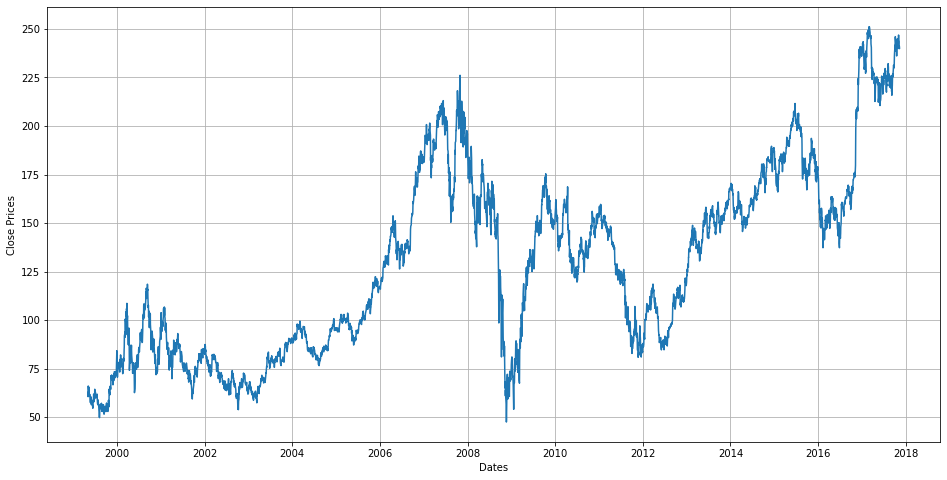

In [ ]:
import matplotlib.pyplot as plt
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('gs.us.txt', sep=',',parse_dates=['Date'],index_col='Date',date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])

## Training and Testing Data visualization:

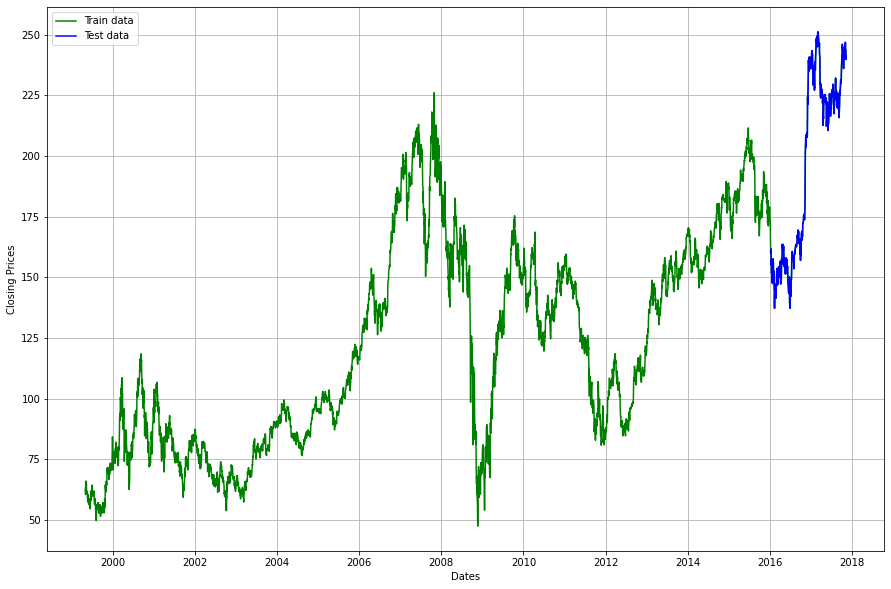

In [ ]:
train_data, test_data = data[0:int(len(data)*0.9)],data[int(len(data)*0.9):]
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data['Close'],'green', label='Train data')
plt.plot(test_data['Close'],'blue',label='Test data')
plt.legend()

## Importing Libraries auto_arima 

In [ ]:
import statsmodels
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(data['Close'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22486.146, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22493.354, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22484.325, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22483.913, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22492.280, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22482.798, Time=1.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22484.865, Time=3.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22484.157, Time=2.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22484.558, Time=0.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22484.549, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22481.985, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22482.943, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=22483.346, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=22483.908, Time=1.23 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data['Close'], order=(1,1,1))
fitted = model.fit(disp=-1)
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4193
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10087.070
Method:                       css-mle   S.D. of innovations              2.683
Date:                Wed, 19 May 2021   AIC                          20182.141
Time:                        10:31:00   BIC                          20207.506
Sample:                             1   HQIC                         20191.111
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0249      0.036      0.700      0.484      -0.045       0.094
ar.L1.D.Close     0.6426      0.105      6.121      0.000       0.437       0.848
ma.L1.D.Close    -0.6937      0.098     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Multiplicative model have visualization of closing prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 1152x576 with 0 Axes>

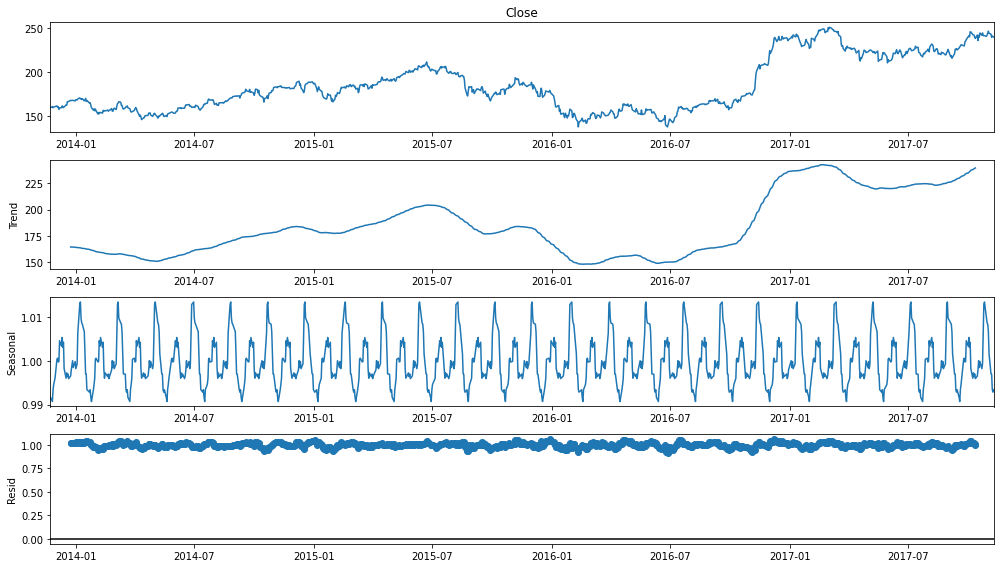

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

data_arima = data['Close']

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_arima[-1000:], model = 'multiplicative', freq=40)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima = train_data['Close']
test_arima = test_data['Close']

history = [x for x in train_arima]
y = test_arima

#make first prediction

predictions = list()
model = ARIMA(history, order = (1,1,1))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

#rolling forecasts
for i in range(1, len(y)):
  #predict
  model = ARIMA(history,order=(1,1,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  #observation
  obs = y[i]
  history.append(obs)

#report performance

mse = mean_squared_error(y,predictions)
print("MSE :" +str(mse))
mae = mean_absolute_error(y,predictions)
print("MAE :" +str(mae))

rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

Streaming output truncated to the last 5000 lines.
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/pytho

MSE :8.035750309540083
MAE :2.085650649130852
RMSE: 2.8347399015677053


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


# Showing Stock Price Closing Prediction Plot 

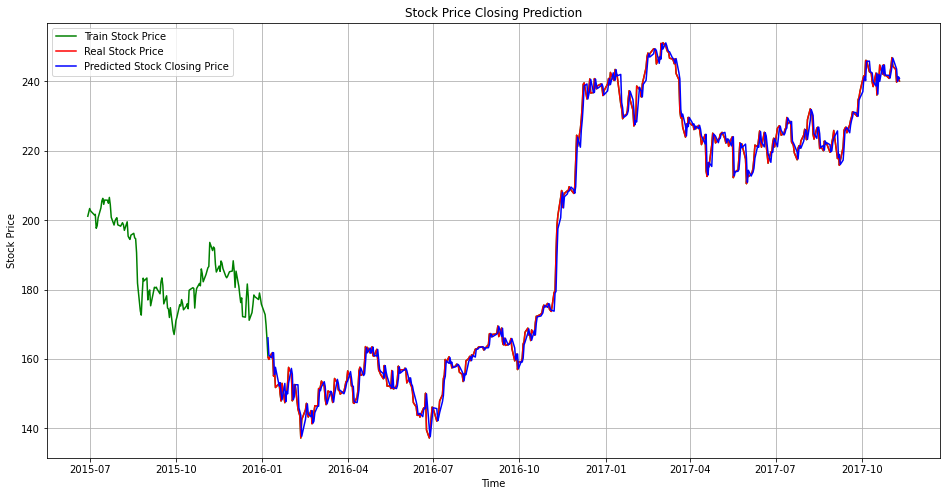

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Close'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Closing Price')
plt.title('Stock Price Closing Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.jpg')
plt.show()

In [ ]:
dataframe=pd.DataFrame(predictions, columns=['predictions']) 
dataframe.head()

,predictions
0,166.120962
1,161.160324
2,160.355254
3,161.885459
4,161.805700


In [ ]:
test_data['Close']

Date
2016-01-07    160.59
2016-01-08    159.92
2016-01-11    161.66
2016-01-12    161.64
2016-01-13    155.09
               ...  
2017-11-06    243.49
2017-11-07    239.81
2017-11-08    241.25
2017-11-09    240.79
2017-11-10    240.15
Name: Close, Length: 467, dtype: float64